# Texture-Based Optical Guided Despeckling of SAR Image

In [1]:
import os
os.environ['JAX_PLATFORM_NAME'] = 'cpu'

import jax
import jax.numpy as jnp
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scripts.io import read_image, save_image, KEY_INPUT_EO, KEY_INPUT_SAR, KEY_OUTPUT_SAR, KEY_INPUT_EMBEDDINGS
from scripts.utils import T
from scripts.texture_descriptor import rgb2gray, rgb2lab, compute_texture_descriptor, compute_descriptor_variance, gaussian_kernel_1d
from scripts.mubf import MUBF
from scripts.despeckle import despeckle

print("Default backend:", jax.default_backend())
print("Devices:", jax.devices())

INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


Default backend: cpu
Devices: [CpuDevice(id=0)]


### Load Data

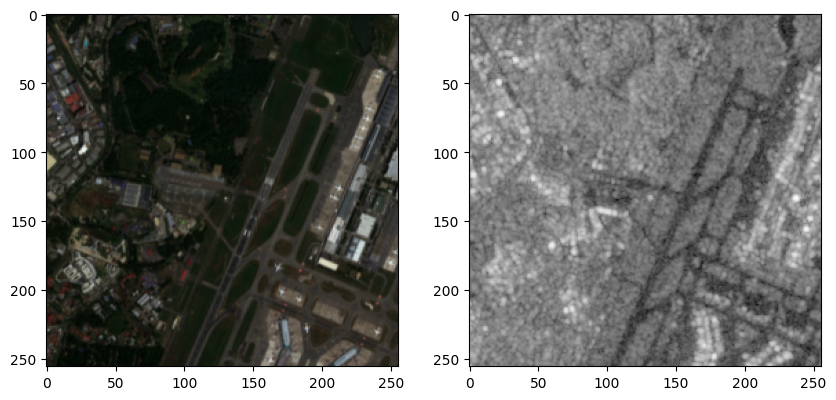

In [ ]:
input_path = "../../dataset/data_changi.npz"

sar = read_image(input_path, key=KEY_INPUT_SAR).squeeze()
eo = read_image(input_path, key=KEY_INPUT_EO)
embeddings = read_image(input_path, key=KEY_INPUT_EMBEDDINGS)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(eo)
plt.subplot(1, 2, 2)
plt.imshow(sar, cmap='gray')

In [4]:
input_sar = sar.copy()
input_sar = input_sar.astype(jnp.float32)

### Despeckle

In [13]:
params_despeckling = {
    "sar": input_sar[..., None],  # (H, W, 1)
    "descriptor": embeddings,
    "sigma_distance": 0.2,
    "radius_despeckling": 50,
    "n_blocks": 10
}

sar_filtered = despeckle(**params_despeckling)






































































































Despeckling: 100%|██████████| 100/100 [02:23<00:00,  1.44s/block]


In [14]:
params = params_despeckling
filtered_keys = ['descriptor', 'sar']
for key in filtered_keys:
    params.pop(key)

params_filtered = params
name = 'aef_changi'
for key, value in params_filtered.items():
    if isinstance(value, list):
        value = '+'.join([str(v) for v in value])
    name += f"_{key}={value}"

name

'aef_changi_sigma_distance=0.2_radius_despeckling=50_n_blocks=10'

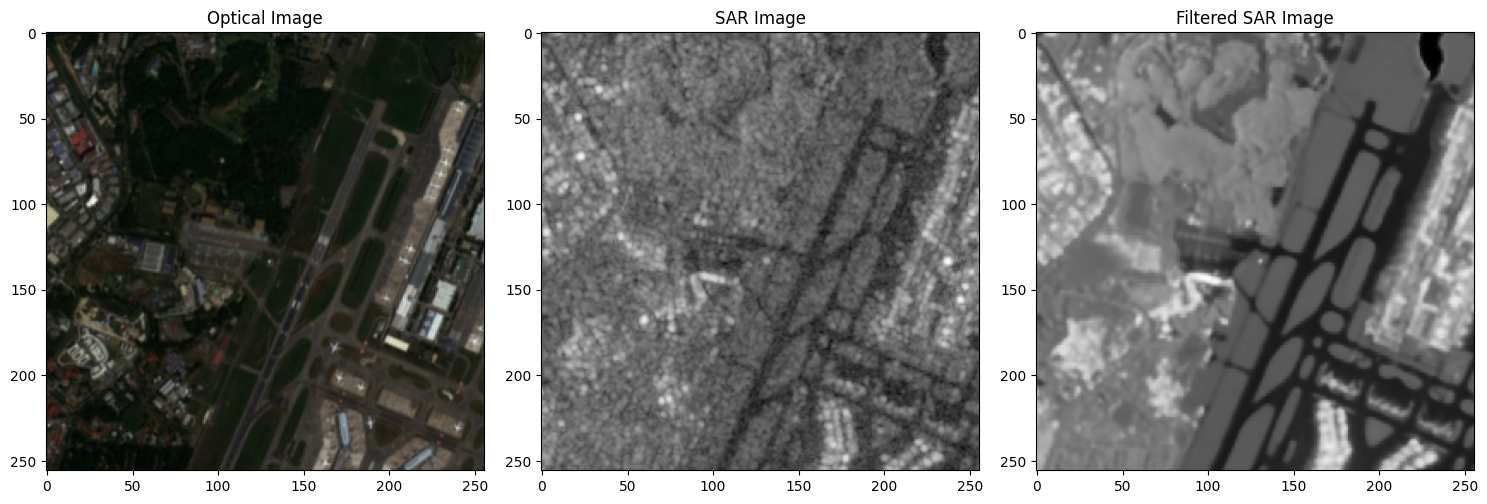

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(eo)
plt.title('Optical Image')
plt.subplot(1, 3, 2)
plt.imshow(sar, cmap='gray')
plt.title('SAR Image')
plt.subplot(1, 3, 3)
plt.imshow(sar_filtered, cmap='gray')
plt.title('Filtered SAR Image')
plt.tight_layout()
# plt.savefig(f'/home/nus/Downloads/{name}.png', dpi=300)

In [ ]:
# output_path = Path().home() / 'workspace/despeckling/despeckling/methods/aef/results/output_changi.mat'

# save_image(str(output_path), sar_filtered, key=KEY_OUTPUT_SAR)